In [1]:
import pandas as pd
import numpy as np
countries=pd.read_csv("countries.csv")
countries.head(30)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import DBSCAN


In [2]:
countries.isnull().sum()# looking for null values

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
GDP ($ per capita)                     1
dtype: int64

In [3]:
#Filling Nan values by mean
countries['Net migration']=countries['Net migration'].fillna( (countries['Net migration'].mean()))

In [4]:
countries['Net migration'].isnull().sum()

0

In [5]:
countries['Infant mortality (per 1000 births)']=countries['Infant mortality (per 1000 births)'].fillna( (countries['Infant mortality (per 1000 births)'].mean()))

In [6]:
countries['Literacy (%)']=countries['Literacy (%)'].fillna( (countries['Literacy (%)'].mean()))

In [7]:
countries['Phones (per 1000)']=countries['Phones (per 1000)'].fillna( (countries['Phones (per 1000)'].mean()))

In [8]:
countries['Arable (%)']=countries['Arable (%)'].fillna( (countries['Arable (%)'].mean()))

In [9]:
countries['Crops (%)']=countries['Crops (%)'].fillna( (countries['Crops (%)'].mean()))

In [10]:
countries['Other (%)']=countries['Other (%)'].fillna( (countries['Other (%)'].mean()))

In [11]:
countries['Climate']=countries['Climate'].fillna( (countries['Climate'].mean()))

In [12]:
countries['Birthrate']=countries['Birthrate'].fillna( (countries['Birthrate'].mean()))

In [13]:
countries['Deathrate']=countries['Deathrate'].fillna( (countries['Deathrate'].mean()))

In [14]:
countries['Agriculture']=countries['Agriculture'].fillna( (countries['Agriculture'].mean()))

In [15]:
countries['Industry']=countries['Industry'].fillna( (countries['Industry'].mean()))

In [16]:
countries['Service']=countries['Service'].fillna( (countries['Service'].mean()))

In [17]:
countries['GDP ($ per capita)']=countries['GDP ($ per capita)'].fillna( (countries['GDP ($ per capita)'].mean()))

In [18]:
countries.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
GDP ($ per capita)                    0
dtype: int64

In [19]:
countries.head(26)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($ per capita)
0,Afghanistan,ASIA,31056997,647500,48.0,0.00,23.06,163.07,36.000000,3.2,12.13,0.22,87.65,1.000000,46.60,20.34,0.380000,0.240000,0.380000,700.0
1,Albania,EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,86.500000,71.2,21.09,4.42,74.49,3.000000,15.11,5.22,232.000000,188.000000,579.000000,4500.0
2,Algeria,AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,70.000000,78.1,3.22,0.25,96.53,1.000000,17.14,4.61,101.000000,0.600000,298.000000,6000.0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,97.000000,259.5,10.00,15.00,75.00,2.000000,22.46,3.27,103.014858,213.869858,393.285377,8000.0
4,Andorra,EUROPE,71201,468,152.1,0.00,6.60,4.05,100.000000,497.2,2.22,0.00,97.78,3.000000,8.71,6.25,103.014858,213.869858,393.285377,19000.0
5,Angola,AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,42.000000,7.8,2.41,0.24,97.35,2.139024,45.11,24.20,96.000000,658.000000,246.000000,1900.0
6,Anguilla,AMERICA,13477,102,132.1,59.80,10.76,21.03,95.000000,460.0,0.00,0.00,100.00,2.000000,14.17,5.34,0.040000,0.180000,0.780000,8600.0
7,Antigua & Barbuda,AMERICA,69108,443,156.0,34.54,-6.15,19.46,89.000000,549.9,18.18,4.55,77.27,2.000000,16.93,5.37,38.000000,0.220000,743.000000,11000.0
8,Argentina,AMERICA,39921833,2766890,14.4,0.18,0.61,15.18,97.100000,220.4,12.31,0.48,87.21,3.000000,16.73,7.55,95.000000,358.000000,547.000000,11200.0
9,Armenia,EUROPE,2976372,29800,99.9,0.00,-6.47,23.28,98.600000,195.7,17.55,2.30,80.15,4.000000,12.07,8.23,239.000000,343.000000,418.000000,3500.0


In [20]:
countries.mean()

Population                            2.874028e+07
Area (sq. mi.)                        5.982270e+05
Pop. Density (per sq. mi.)            3.790471e+02
Coastline (coast/area ratio)          2.116533e+01
Net migration                         3.812500e-02
Infant mortality (per 1000 births)    3.550696e+01
Literacy (%)                          8.283828e+01
Phones (per 1000)                     2.360614e+02
Arable (%)                            1.379711e+01
Crops (%)                             4.564222e+00
Other (%)                             8.163831e+01
Climate                               2.139024e+00
Birthrate                             2.211473e+01
Deathrate                             9.241345e+00
Agriculture                           1.030149e+02
Industry                              2.138699e+02
Service                               3.932854e+02
GDP ($ per capita)                    9.689823e+03
dtype: float64

In [21]:
countries.loc[countries['Region'] =='EUROPE', 'Region'] = 1
countries.loc[countries['Region'] != 1, 'Region'] = 0

In [22]:
countries["Region"].values

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
countries=countries.drop('Country',1)

In [24]:

x=countries.iloc[:,1:]
y=countries.iloc[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y)
#training adaboost
model=AdaBoostClassifier(n_estimators=x.shape[1],algorithm='SAMME')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)
model.estimator_weights_ #w
model.estimators_
print(accuracy_score(y_test,y_pred))



0.9473684210526315


In [25]:
def compute_alph(x_train,y_train, weakLearner,alpha,weights):                
    alpha=alpha.copy()
    for i in range(len(weakLearner)):
        predict=weakLearner[i].predict(x_train)
        ec_arr = np.array((y_train == predict) * -1)
        ec_arr[ec_arr == 0] = 1
        alpha = alpha * (np.exp(weights[i] * ec_arr))
        alpha= alpha/alpha.sum()
    return alpha
alpha=np.repeat(1,len(x_train))

var=compute_alph(x_train,y_train,model.estimators_,alpha,model.estimator_weights_)



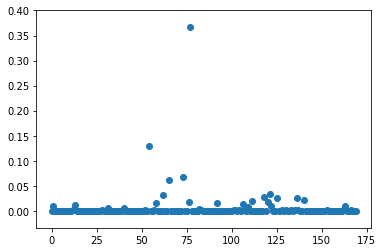

In [26]:
plt.scatter([x for x in range(len(var))],var)

In [27]:
db= DBSCAN(eps=0.01,min_samples=5).fit(np.reshape(var,(-1,1)))

arr = db.labels_ == -1 #converting values of array from binary to boolean ones


In [28]:
def remove_outlier(x_train,variable,y):
    x_train=x_train[~variable]
    y= y[~variable]    
    return x_train,y
    
print(x_train.shape,y_train.shape)
       
x_train,y_train=remove_outlier(x_train,arr,y_train)  

print(x_train.shape,y_train.shape)# noticing dimensions change,otliers removed
            

(170, 18) (170,)
(166, 18) (166,)


In [29]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)


0.9473684210526315

REPORT:
-First step has been to preprocess this dataset.I have removed first column of 'Country' and filled all the NaN values by the mean of the respective columns.Checked for Nan values and there were none.
-To convert it a classification problem i have converted values of column'Region' for Europian Countries with 1 and others 0.
-Next, divided data in x, y for training and labels, and used train_test_split for dividing data in trainig and testing to use in our classifier.
-Next used AdaBoost classifier to find outliers, to find coefficients and weights.
-Then we construct a function to recompute and normalize weights.
--In this step we use found alphas  in dbscan function in order to find outliers.
- Next, constructing a function for removing outliers.
-Retraining the model without outliers.
Noticing accuracy without outliers and comparing it to when outliers existed and used adaboost classifier.
Finally noticing slightly improvements(or equal case) in terms of accuracy regarding with/without outliers.

